6. Calculate the yield of the areas N-9.1, N-9.2, N-9.3 without external effects. Use the long-term corrected ERA5 data as 
input. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV

# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

In [2]:
## get timeseries-data (here ERA5 as example)
from ERA5 import load_data,calculate_wind_speed,calculate_wind_direction,calculate_averages,check_data_gaps

Era5_path = 'data/reanalysis'  
start_year = 2000
end_year = 2001
    
Era5_data = load_data(Era5_path, start_year, end_year)
Era5_data = calculate_wind_speed(Era5_data)
Era5_data = calculate_wind_direction(Era5_data)

data = Era5_data
data.columns

Data Availability is 99.97%
Missing time periods are:
DatetimeIndex(['2023-02-26 00:00:00', '2023-02-26 01:00:00',
               '2023-02-26 02:00:00', '2023-02-26 03:00:00',
               '2023-02-26 04:00:00', '2023-02-26 05:00:00',
               '2023-02-26 06:00:00', '2023-02-26 07:00:00',
               '2023-02-26 08:00:00', '2023-02-26 09:00:00',
               '2023-02-26 10:00:00', '2023-02-26 11:00:00',
               '2023-02-26 12:00:00', '2023-02-26 13:00:00',
               '2023-02-26 14:00:00', '2023-02-26 15:00:00',
               '2023-02-26 16:00:00', '2023-02-26 17:00:00',
               '2023-02-26 18:00:00', '2023-02-26 19:00:00',
               '2023-02-26 20:00:00', '2023-02-26 21:00:00',
               '2023-02-26 22:00:00', '2023-02-26 23:00:00',
               '2023-02-27 00:00:00', '2023-02-27 01:00:00',
               '2023-02-27 02:00:00', '2023-02-27 03:00:00',
               '2023-02-27 04:00:00', '2023-02-27 05:00:00',
               '2023-02-27 06:0

c:\Advanced Programming\Project\StudentProject-Yield-Predictions-Offshore\ERA5.py:62: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=Era5_data.index.min(), end=Era5_data.index.max(), freq='H')


Index(['Time [UTC]', 'u100', 'v100', 'u10', 'v10', 'WS100', 'WS10', 'WD100',
       'WD10'],
      dtype='object')

## Task6

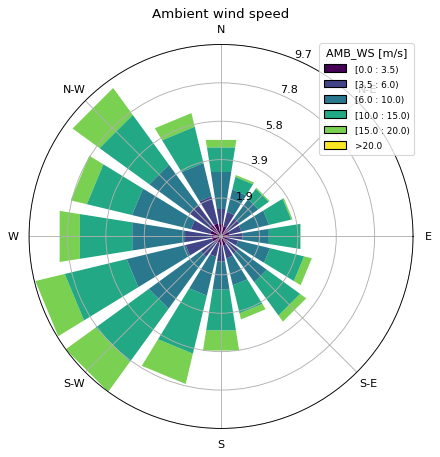

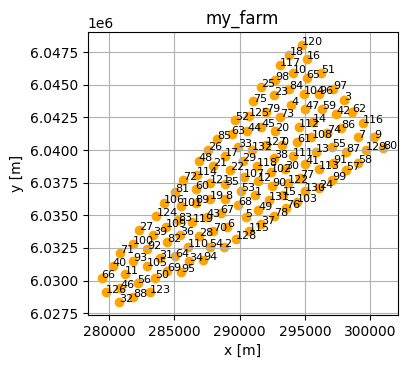

calculating wind farm power for layout-N-9.1.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 119.34 ms
[########################################] | 100% Completed | 334.87 s
Efficiency added to farm results


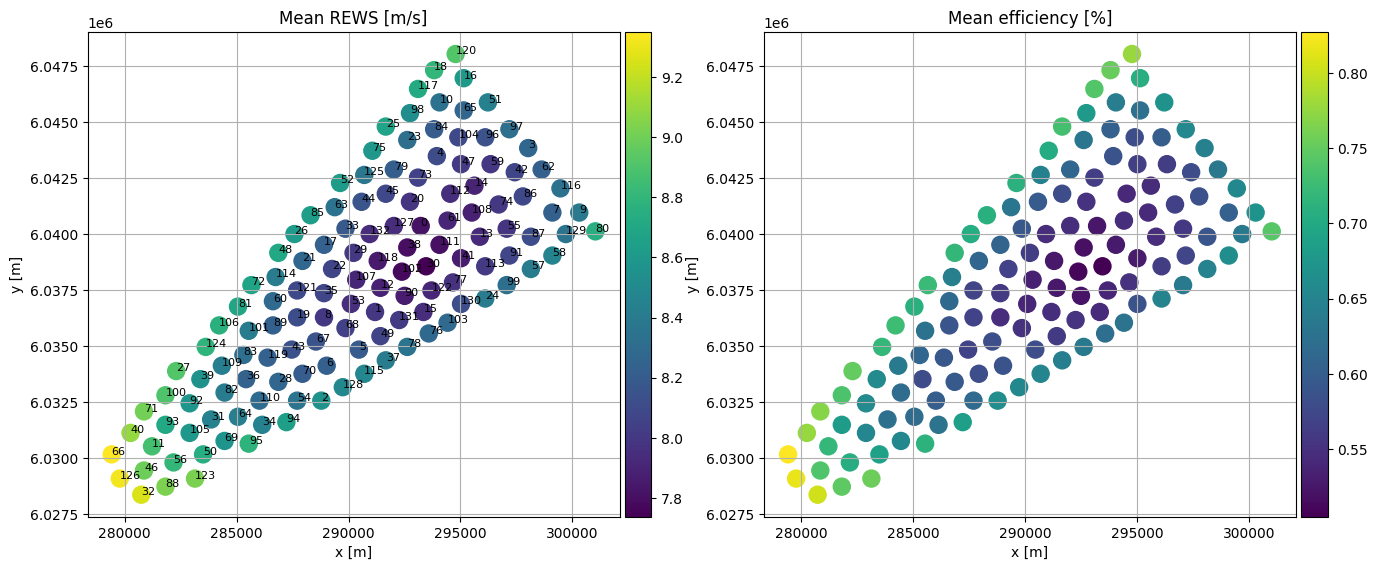


Farm power        : 927.2 MW
Farm ambient power: 1229.1 MW
Farm efficiency   : 75.44 %
Annual farm yield : 8.12 TWh


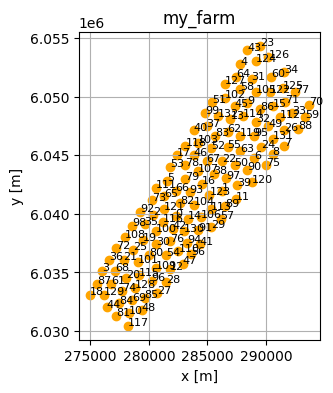

calculating wind farm power for layout-N-9.2.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 124.06 ms
[########################################] | 100% Completed | 328.99 s
Efficiency added to farm results


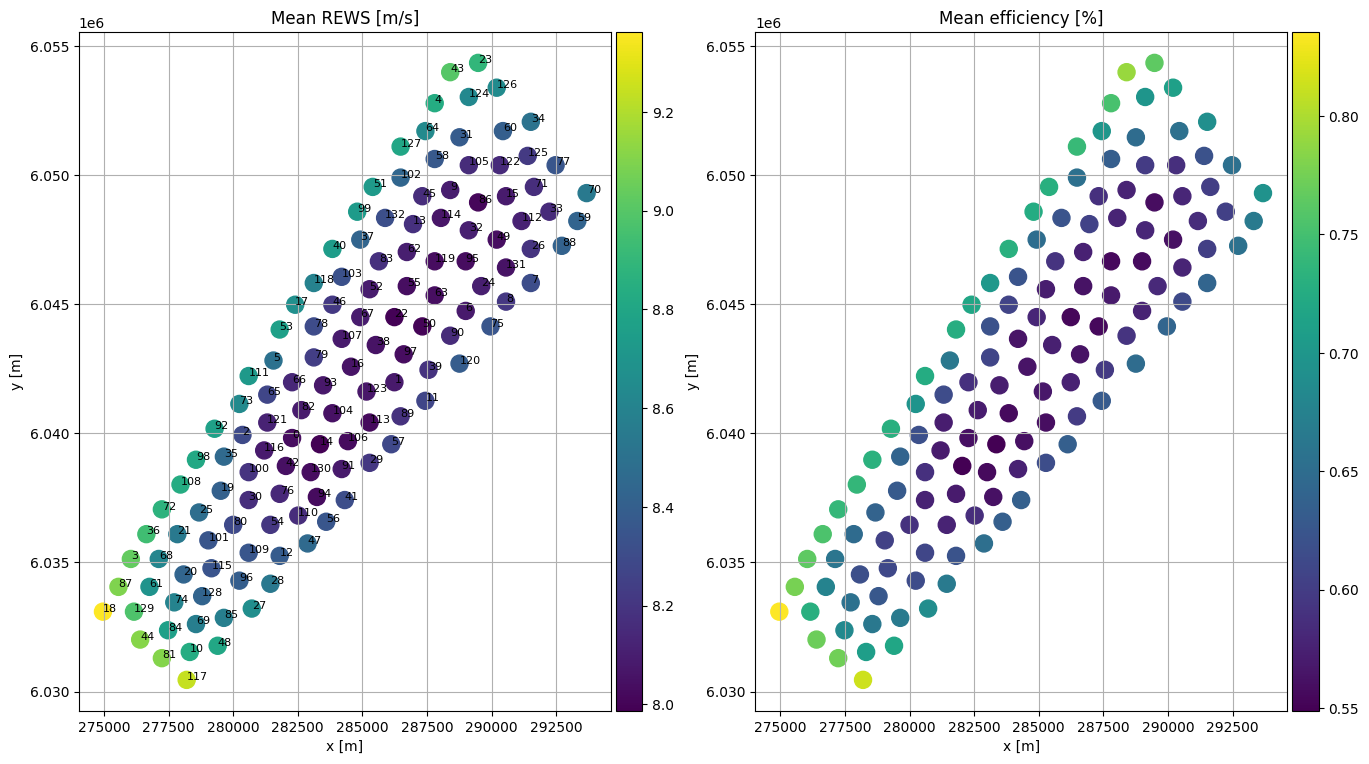


Farm power        : 937.3 MW
Farm ambient power: 1229.1 MW
Farm efficiency   : 76.26 %
Annual farm yield : 8.21 TWh


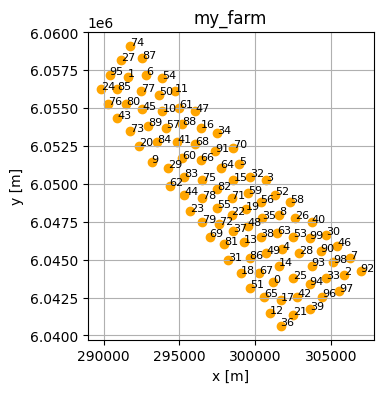

calculating wind farm power for layout-N-9.3.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 120.60 ms
[########################################] | 100% Completed | 221.25 s
Efficiency added to farm results


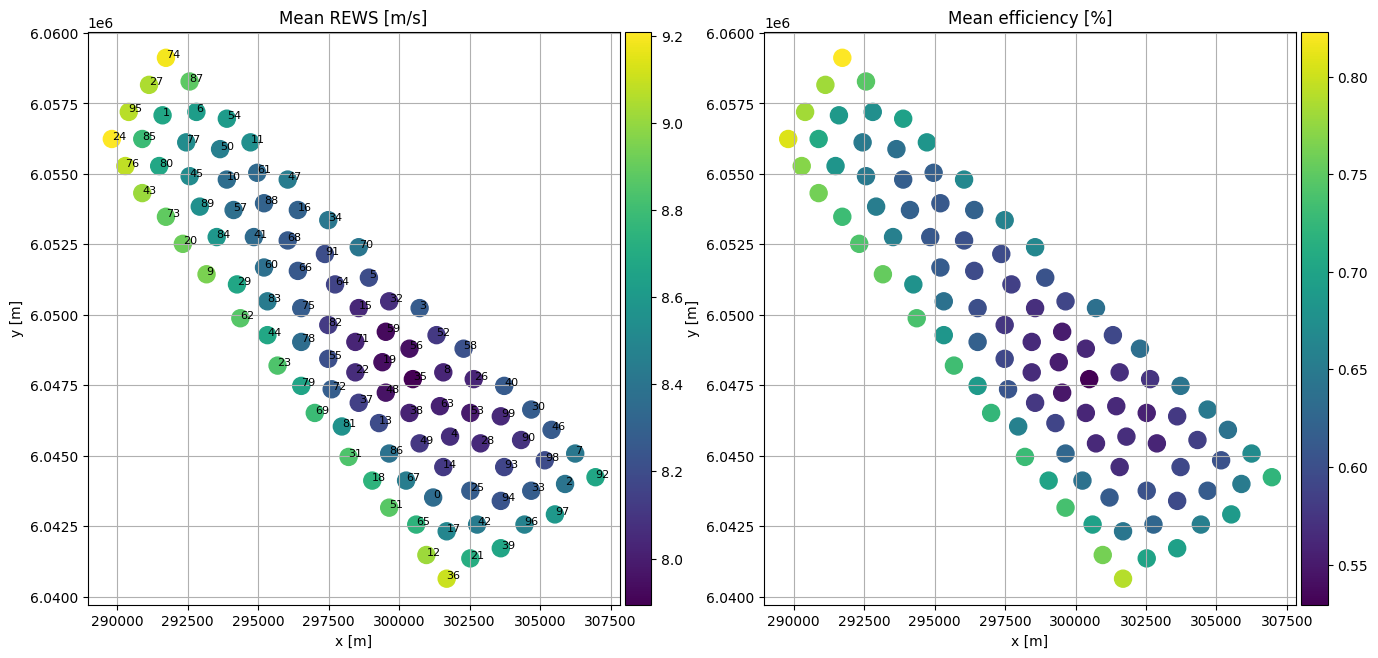


Farm power        : 711.9 MW
Farm ambient power: 924.1 MW
Farm efficiency   : 77.04 %
Annual farm yield : 6.24 TWh


In [3]:
## Running Power calculation for each Area in a function

# import the custome function
from Foxes_Farm_Power import Foxes_Farm_Power
# Foxes_Farm_Power(Farm_Layout+Name,States,Parameters)
    # Farm_Layout+Name  : list containing Layout as df and a string as the name  
        # Farm_Layout : pd.datafram containing Layout of Turbines
        # Name        : Name of the Layout
    # States : Wind conditions
    # Parameters: dict
        # TType         : Turbine-Type           # "NREL5MW" , "IEA15MW"
        # rotor_model   :
        # wake_models   :
        # partial_wakes :

###-------------------------------------add Turbine Layouts----------------------------------###
# create 3 Dataframes for Turbine Layouts
current_path =  turbines_area_of_interest_path                           # path .csv's
turb_files = os.listdir(turbines_area_of_interest_path)
Turb_dfs = [(read_csv(current_path + file),file) for file in turb_files] # read files in path to dataframe and put's those in list, also pass filename


###----------------------------------------Add States-----------------------------------------###
# define States as Foxes object and have a look at the wind rose.
# Wind and other atmospheric inflow conditions are called `States`
States = foxes.input.states.Timeseries(                      # StatesTable for panda df or pd readable file (single height)
    data_source = data ,                                         # the data
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "WS100", FV.WD: "WD100", FV.TI: "ti"}, # Mapping from variable names to data column names
    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  # TI = Turbulanze Intensity %5 default
    )

# Plot windrose
o = foxes.output.StatesRosePlotOutput(States, point=[0., 0., 100.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )

###--------------------------------------compute farm results--------------------------------------###
Farm_Results = []
for Farm in Turb_dfs:
    Farm_Results.append(Foxes_Farm_Power(Farm,States,Parameters))

# algo.all_models(with_states=True) ##return all models used in our algo    

In [4]:
####-----------------------------------------Results-------------------------------------------#####
# Note: Farm_Results is a list of dataframes

# combine df to single df
Result = Farm_Results[0]
for i in range(len(Farm_Results))[1:]:
    Result.loc[Farm_Results[i].index[0]] = Farm_Results[i].values.flatten().tolist()

# calculate Sum for Power and Mean for Efficiency
Result.loc["Sum / Mean"] = [
    Result[Result.columns[0]].sum(),
    Result[Result.columns[1]].sum(),
    Result[Result.columns[2]].mean(),
    Result[Result.columns[3]].sum()
    ]

Result.head().style.format(precision=1)   # print Result roundet to 1 decimal point

,Farm power [MW],Farm ambient power [MW],Farm efficiency [%],Annual farm yield [TWh]
N-9.1.,927.2,1229.1,75.4,8.1
N-9.2.,937.3,1229.1,76.3,8.2
N-9.3.,711.9,924.1,77.0,6.2
Sum / Mean,2576.4,3382.2,76.2,22.6


### Compute for Farm as a whole

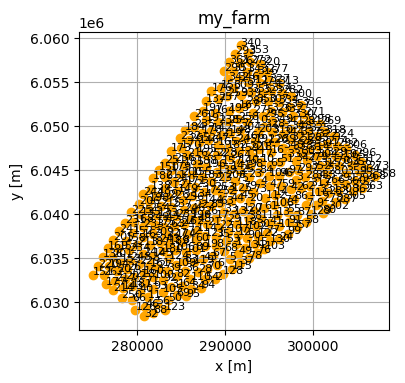

calculating wind farm power for N.9.1-3 Cluster for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 116.59 ms
[########################################] | 100% Completed | 76m 4ss
Efficiency added to farm results


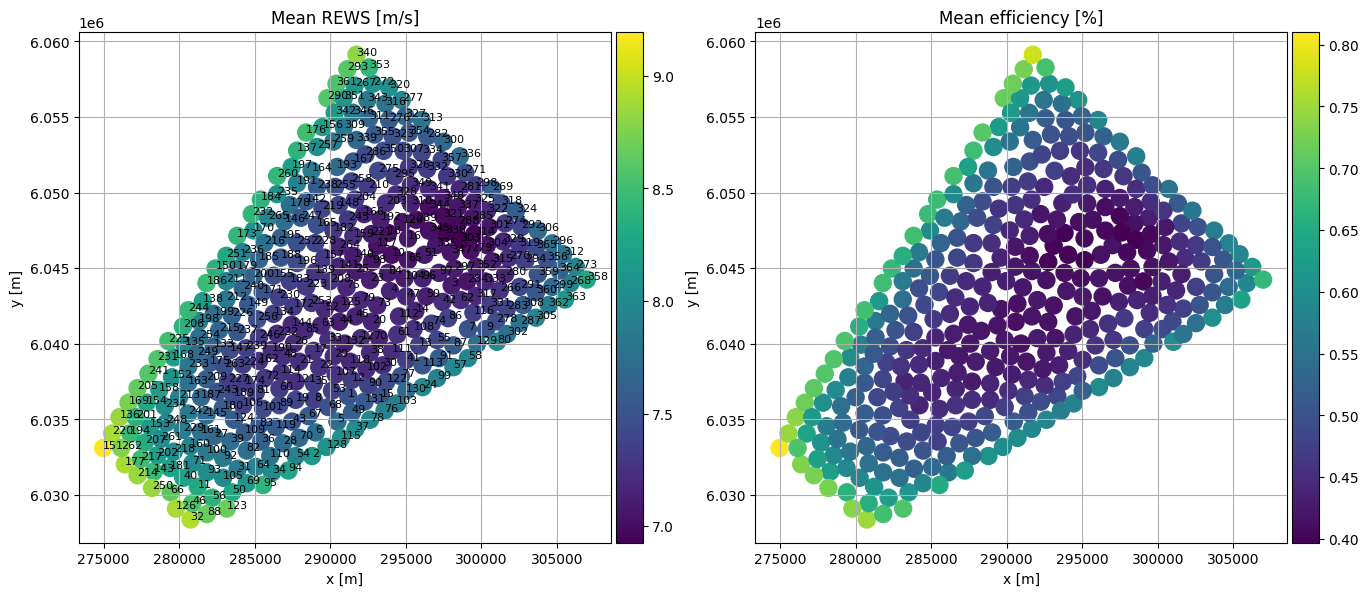


Farm power        : 2178.7 MW
Farm ambient power: 3382.2 MW
Farm efficiency   : 64.42 %
Annual farm yield : 19.09 TWh


,Farm power [MW],Farm ambient power [MW],Farm efficiency [%],Annual farm yield [TWh]
N-9.1.,927.2,1229.1,75.4,8.1
N-9.2.,937.3,1229.1,76.3,8.2
N-9.3.,711.9,924.1,77.0,6.2
Sum / Mean,2576.4,3382.2,76.2,22.6
N.9.1-3 Cluster,2178.7,3382.2,64.4,19.1


In [5]:
###-------------------------------------get Turbine Layouts----------------------------------###
# combine previus Turbine_Layouts
Cluster_Turb_df = pd.concat([Turb_dfs[0][0], Turb_dfs[1][0],Turb_dfs[2][0]], ignore_index=True)
Cluster_Turb_df = (Cluster_Turb_df, "N.9.1-3 Cluster")
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )
###--------------------------------------compute farm results--------------------------------------###

Result = pd.concat(                                             # add's new output df to Results Dataframe
    [Result,                                                    # the previous results we add to 
    Foxes_Farm_Power(Cluster_Turb_df,States,Parameters)         # run the function
    ], ignore_index=False)                                      # keep the name we passed
Result.style.format(precision=1)
 
# algo.all_models(with_states=True) ##return all models used in our algo    

## Compute Power for gem.Layout

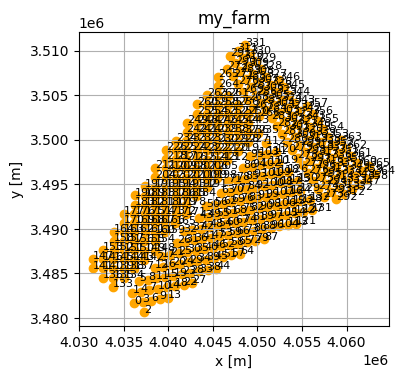

calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 128.14 ms
[########################################] | 100% Completed | 40m 42s
Efficiency added to farm results


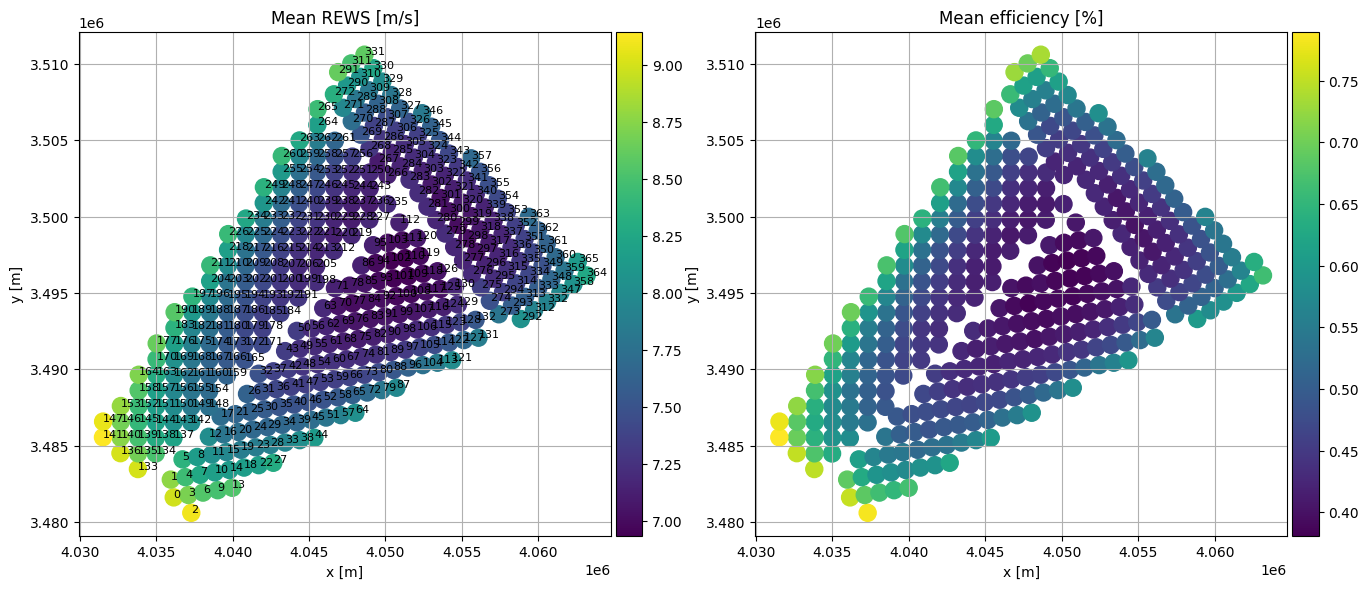


Farm power        : 2146.9 MW
Farm ambient power: 3382.2 MW
Farm efficiency   : 63.48 %
Annual farm yield : 18.81 TWh


,Farm power [MW],Farm ambient power [MW],Farm efficiency [%],Annual farm yield [TWh]
N-9.1.,927.2,1229.1,75.4,8.1
N-9.2.,937.3,1229.1,76.3,8.2
N-9.3.,711.9,924.1,77.0,6.2
Sum / Mean,2576.4,3382.2,76.2,22.6
N.9.1-3 Cluster,2178.7,3382.2,64.4,19.1
gem.Layout N9 Cluster,2146.9,3382.2,63.5,18.8


In [6]:

###-------------------------------------get Turbine Layouts----------------------------------###
# get the layout we generated in Task 5 by loading the .csv files
Areas = ['N-9.1','N-9.2','N-9.3'] 
Layout_Path = ["NoWake_Layout_" + area + ".csv" for area in Areas]
Layout_dfs = [read_csv(file) for file in Layout_Path]                #list of dataframes

geo_Cluster_Turb_df = pd.concat([Layout_dfs[0],Layout_dfs[1],Layout_dfs[2]], ignore_index=True)
geo_Cluster_Turb_df = [geo_Cluster_Turb_df, "gem.Layout N9 Cluster"]   # with name to pass to Funktion
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )
###--------------------------------------compute farm results--------------------------------------###

Result = pd.concat(                                             # add's new output df to Results Dataframe
    [Result,                                                    # the previous results we add to 
    Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)         # run the function
    ], ignore_index=False)                                      # keep the name we passed
Result.style.format(precision=1) 

### Task 7: Use different Foxes Setup


In [7]:
# # chose diffrent Parameters. Here is a list of all options.
# mbook_show = foxes.ModelBook()
# mbook_show.print_toc()     # print all available Models

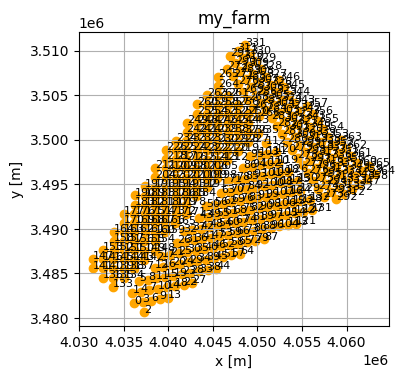

calculating wind farm power for gem.Layout N9 Cluster(TurbOPark) for Wake Model: ['TurbOPark_linear']:
[########################################] | 100% Completed | 1.32 s
[########################################] | 100% Completed | 45m 22s
Efficiency added to farm results


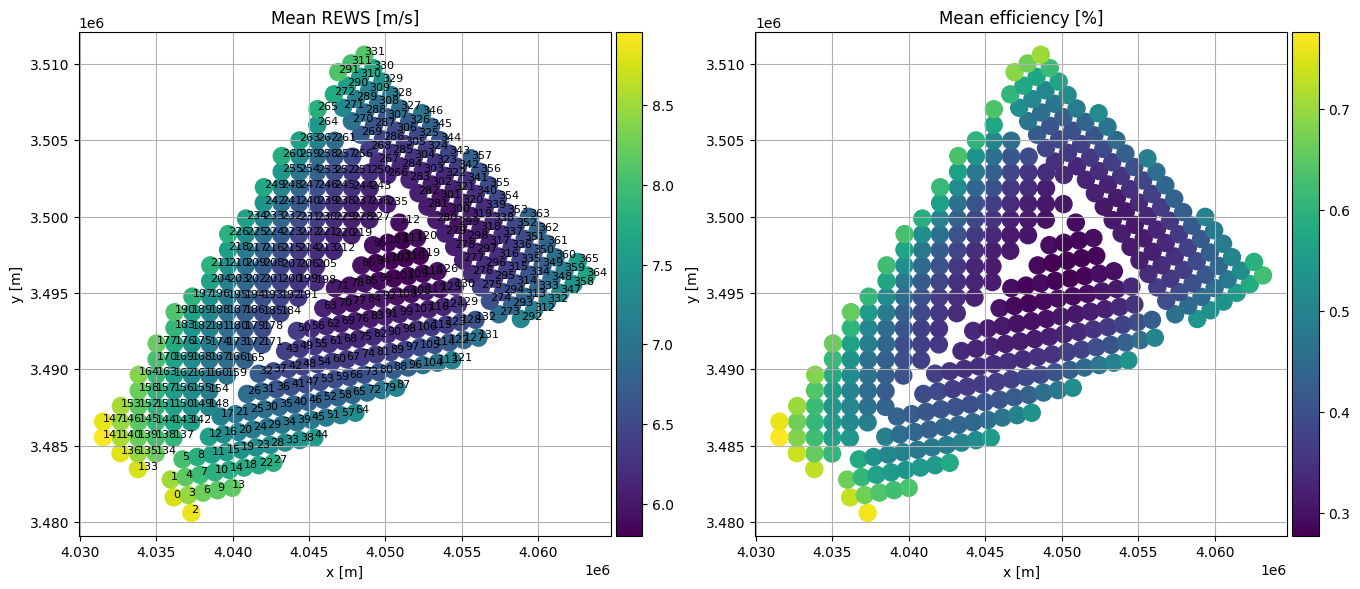


Farm power        : 1876.9 MW
Farm ambient power: 3382.2 MW
Farm efficiency   : 55.49 %
Annual farm yield : 16.44 TWh


,Farm power [MW],Farm ambient power [MW],Farm efficiency [%],Annual farm yield [TWh]
N-9.1.,927.2,1229.1,75.4,8.1
N-9.2.,937.3,1229.1,76.3,8.2
N-9.3.,711.9,924.1,77.0,6.2
Sum / Mean,2576.4,3382.2,76.2,22.6
N.9.1-3 Cluster,2178.7,3382.2,64.4,19.1
gem.Layout N9 Cluster,2146.9,3382.2,63.5,18.8
gem.Layout N9 Cluster(TurbOPark),1876.9,3382.2,55.5,16.4


In [8]:
## TurbOPark Modell

## rest is same as above 

geo_Cluster_Turb_df[1] = "gem.Layout N9 Cluster(TurbOPark)"    # change Name 
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              
    TType         = "IEA15MW",                  
    rotor_model   = "centre",
    wake_models   = ["TurbOPark_linear"],            #changed from: ["Bastankhah2014_linear"]
    partial_wakes = None,
    )
###--------------------------------------compute farm results--------------------------------------###
Result = pd.concat(                                             # add's new output df to Results Dataframe
    [Result,                                                    # the previous results we add to 
    Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)         # run the function
    ], ignore_index=False)                                      # keep the name we passed
Result.style.format(precision=1)

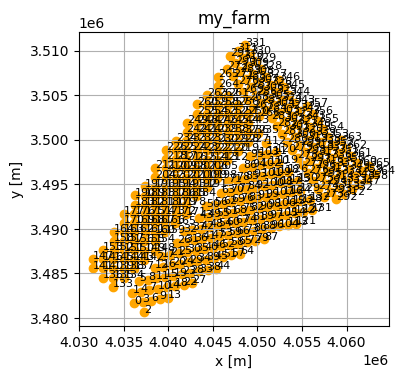

calculating wind farm power for gem.Layout N9 Cluster(Jensen) for Wake Model: ['Jensen_linear']:
[########################################] | 100% Completed | 121.89 ms
[########################################] | 100% Completed | 334.96 s
Efficiency added to farm results


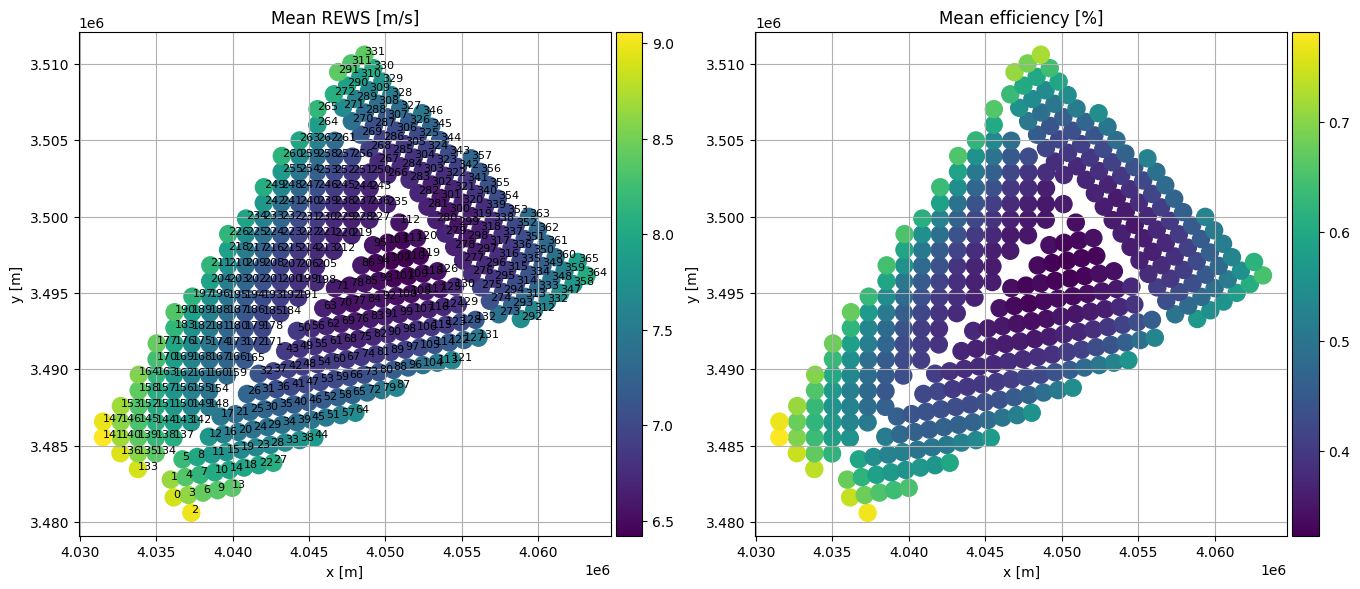


Farm power        : 2027.7 MW
Farm ambient power: 3382.2 MW
Farm efficiency   : 59.95 %
Annual farm yield : 17.76 TWh


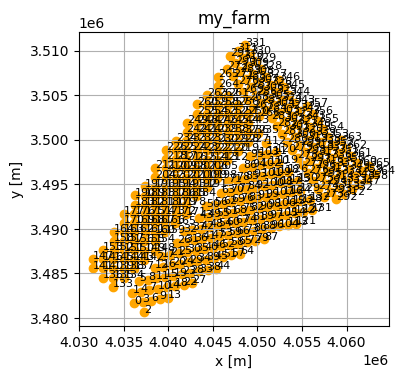

calculating wind farm power for gem.Layout N9 Cluster(Jensen) for Wake Model: ['Jensen_linear']:
[########################################] | 100% Completed | 119.77 ms
[########################################] | 100% Completed | 348.41 s
Efficiency added to farm results


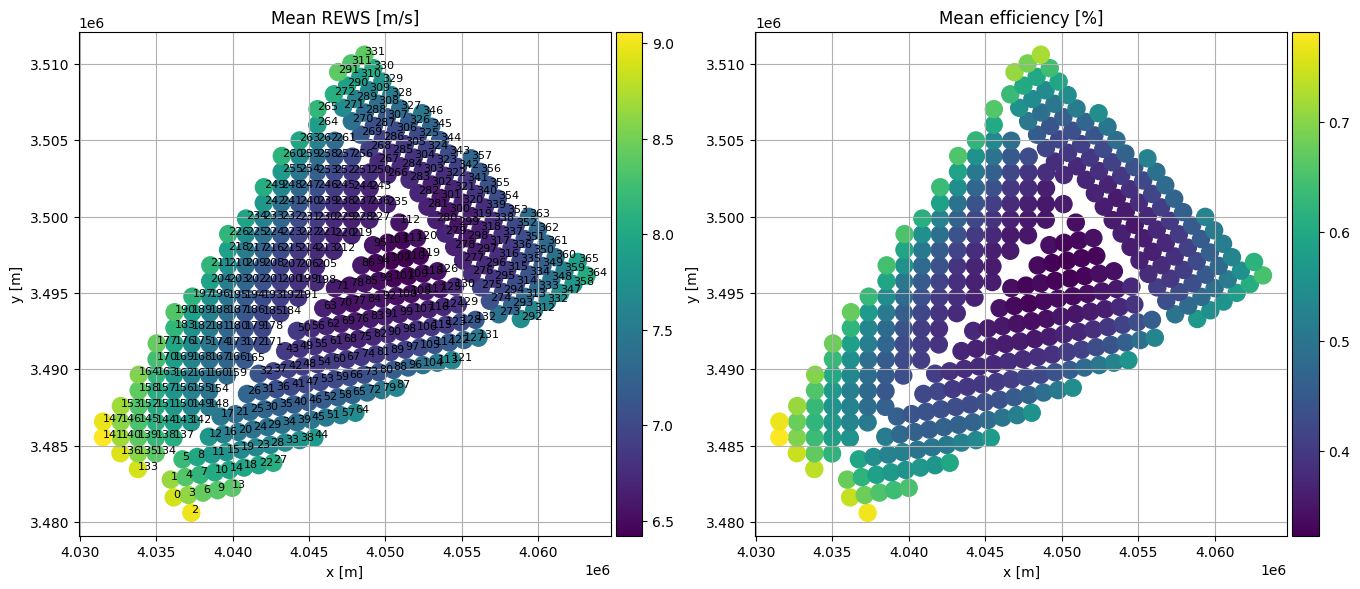


Farm power        : 2027.7 MW
Farm ambient power: 3382.2 MW
Farm efficiency   : 59.95 %
Annual farm yield : 17.76 TWh


,Farm power [MW],Farm ambient power [MW],Farm efficiency [%],Annual farm yield [TWh]
N-9.1.,927.2,1229.1,75.4,8.1
N-9.2.,937.3,1229.1,76.3,8.2
N-9.3.,711.9,924.1,77.0,6.2
Sum / Mean,2576.4,3382.2,76.2,22.6
N.9.1-3 Cluster,2178.7,3382.2,64.4,19.1
gem.Layout N9 Cluster,2146.9,3382.2,63.5,18.8
gem.Layout N9 Cluster(TurbOPark),1876.9,3382.2,55.5,16.4
gem.Layout N9 Cluster(Jensen),2027.7,3382.2,60.0,17.8


In [9]:
## Jensen Modell

## rest is same as above 

geo_Cluster_Turb_df[1] = "gem.Layout N9 Cluster(Jensen)"    # change Name 
###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              
    TType         = "IEA15MW",                  
    rotor_model   = "centre",
    wake_models   = ["Jensen_linear"],            #changed from: ["Bastankhah2014_linear"]
    partial_wakes = None,
    )
###--------------------------------------compute farm results--------------------------------------###
Jensen = Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)

Result = pd.concat(                                             # add's new output df to Results Dataframe
    [Result,                                                    # the previous results we add to 
    Foxes_Farm_Power(geo_Cluster_Turb_df,States,Parameters)         # run the function
    ], ignore_index=False)                                      # keep the name we passed
Result.style.format(precision=1)